## Prediction Solar

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime
from sklearn.metrics import mean_squared_error, r2_score,accuracy_score
import seaborn as sns
from pandas import DataFrame
from matplotlib.pylab import rcParams
#rcParams['figure . figsize'] = 10 , 6
rcParams['figure.figsize'] = (10, 6)


%matplotlib inline
sns.set(rc={'figure.figsize': [8, 8]}, font_scale=1.2)

In [3]:
df = pd.read_csv('20171231.csv')

In [4]:
df.head(1)

,DATE (MM/DD/YYYY),MST,Global SPP (vent/cor) [W/m^2],Zenith Angle [degrees],Azimuth Angle [degrees],Solar Eclipse Shading,Total Cloud Cover [%],Station Pressure [mBar],Precipitation (Accumulated) [mm],Moisture,Broadband Turbidity
0,12/31/2017,07:24,2.251,89.99719,120.17605,0,-1,820.202,0.0,0.0,0.32892


In [6]:
df = df.rename(columns = {'DATE (MM/DD/YYYY)': 'DATE', 'MST': 'MST','Global SPP (vent/cor) [W/m^2]':'Global_SPP', 'Zenith Angle [degrees]': 'Zenith_Angle', 'Azimuth Angle [degrees]': 'Azimuth_Angle ', 'Solar Eclipse Shading': 'Solar_Eclipse', 'Solar Eclipse Shading': 'Solar_Eclipse', 'Total Cloud Cover [%]': 'Total_Cloud_Cover', 'Station Pressure [mBar]': 'Station_Pressure', 'Precipitation (Accumulated) [mm]': 'Precipitation', 'Moisture': 'Moisture', 'Broadband Turbidity': 'Broadband_Turbidity'}, inplace = False)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266220 entries, 0 to 266219
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   DATE                 266220 non-null  object 
 1   MST                  266220 non-null  object 
 2   Global_SPP           266220 non-null  float64
 3   Zenith_Angle         266220 non-null  float64
 4   Azimuth_Angle        266220 non-null  float64
 5   Solar_Eclipse        266220 non-null  int64  
 6   Total_Cloud_Cover    266220 non-null  int64  
 7   Station_Pressure     266220 non-null  float64
 8   Precipitation        266220 non-null  float64
 9   Moisture             266220 non-null  float64
 10  Broadband_Turbidity  266220 non-null  float64
dtypes: float64(7), int64(2), object(2)
memory usage: 22.3+ MB


In [8]:
df['date'] = df['DATE']  +' '+ df['MST']

In [9]:
df

,DATE,MST,Global_SPP,Zenith_Angle,Azimuth_Angle,Solar_Eclipse,Total_Cloud_Cover,Station_Pressure,Precipitation,Moisture,Broadband_Turbidity,date
0,12/31/2017,07:24,2.25100,89.99719,120.17605,0,-1,820.202,0.0,0.0,0.32892,12/31/2017 07:24
1,12/31/2017,07:25,2.36050,89.85344,120.33517,0,-1,820.216,0.0,0.0,0.22059,12/31/2017 07:25
2,12/31/2017,07:26,2.55924,89.70895,120.49457,0,-1,820.197,0.0,0.0,0.19335,12/31/2017 07:26
3,12/31/2017,07:27,2.74433,89.56361,120.65425,0,-1,820.227,0.0,0.0,0.20856,12/31/2017 07:27
4,12/31/2017,07:28,2.88435,89.41737,120.81422,0,-1,820.248,0.0,0.0,0.22422,12/31/2017 07:28
...,...,...,...,...,...,...,...,...,...,...,...,...
266215,12/31/2018,16:39,2.21827,89.30087,239.07317,0,-1,816.477,0.0,1.0,0.24961,12/31/2018 16:39
266216,12/31/2018,16:40,2.20649,89.44778,239.23343,0,-1,816.482,0.0,1.0,0.24004,12/31/2018 16:40
266217,12/31/2018,16:41,2.24534,89.59378,239.39342,0,-1,816.466,0.0,1.0,0.23398,12/31/2018 16:41
266218,12/31/2018,16:42,2.31470,89.73890,239.55311,0,-1,816.495,0.0,1.0,0.22369,12/31/2018 16:42


In [10]:
df['date'] = pd.to_datetime(df['date'], format='%m/%d/%Y %H:%M')
df.head()

,DATE,MST,Global_SPP,Zenith_Angle,Azimuth_Angle,Solar_Eclipse,Total_Cloud_Cover,Station_Pressure,Precipitation,Moisture,Broadband_Turbidity,date
0,12/31/2017,07:24,2.25100,89.99719,120.17605,0,-1,820.202,0.0,0.0,0.32892,2017-12-31 07:24:00
1,12/31/2017,07:25,2.36050,89.85344,120.33517,0,-1,820.216,0.0,0.0,0.22059,2017-12-31 07:25:00
2,12/31/2017,07:26,2.55924,89.70895,120.49457,0,-1,820.197,0.0,0.0,0.19335,2017-12-31 07:26:00
3,12/31/2017,07:27,2.74433,89.56361,120.65425,0,-1,820.227,0.0,0.0,0.20856,2017-12-31 07:27:00
4,12/31/2017,07:28,2.88435,89.41737,120.81422,0,-1,820.248,0.0,0.0,0.22422,2017-12-31 07:28:00


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266220 entries, 0 to 266219
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   DATE                 266220 non-null  object        
 1   MST                  266220 non-null  object        
 2   Global_SPP           266220 non-null  float64       
 3   Zenith_Angle         266220 non-null  float64       
 4   Azimuth_Angle        266220 non-null  float64       
 5   Solar_Eclipse        266220 non-null  int64         
 6   Total_Cloud_Cover    266220 non-null  int64         
 7   Station_Pressure     266220 non-null  float64       
 8   Precipitation        266220 non-null  float64       
 9   Moisture             266220 non-null  float64       
 10  Broadband_Turbidity  266220 non-null  float64       
 11  date                 266220 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(7), int64(2), object(2)
memory usage: 24.4

In [12]:
df['Year'] = df['date'].dt.year
df['Month'] = df['date'].dt.month
df['Month_Name'] = df['date'].dt.month_name()
df['Week'] = df['date'].dt.week
df['Day'] = df['date'].dt.day
df['Week_Day'] = df['date'].dt.weekday
df['Day_Name'] = df['date'].dt.day_name()
df['Hour'] = df['date'].dt.hour
df['Minute'] = df['date'].dt.minute
df.head()

c:\users\ad\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  after removing the cwd from sys.path.


,DATE,MST,Global_SPP,Zenith_Angle,Azimuth_Angle,Solar_Eclipse,Total_Cloud_Cover,Station_Pressure,Precipitation,Moisture,...,date,Year,Month,Month_Name,Week,Day,Week_Day,Day_Name,Hour,Minute
0,12/31/2017,07:24,2.25100,89.99719,120.17605,0,-1,820.202,0.0,0.0,...,2017-12-31 07:24:00,2017,12,December,52,31,6,Sunday,7,24
1,12/31/2017,07:25,2.36050,89.85344,120.33517,0,-1,820.216,0.0,0.0,...,2017-12-31 07:25:00,2017,12,December,52,31,6,Sunday,7,25
2,12/31/2017,07:26,2.55924,89.70895,120.49457,0,-1,820.197,0.0,0.0,...,2017-12-31 07:26:00,2017,12,December,52,31,6,Sunday,7,26
3,12/31/2017,07:27,2.74433,89.56361,120.65425,0,-1,820.227,0.0,0.0,...,2017-12-31 07:27:00,2017,12,December,52,31,6,Sunday,7,27
4,12/31/2017,07:28,2.88435,89.41737,120.81422,0,-1,820.248,0.0,0.0,...,2017-12-31 07:28:00,2017,12,December,52,31,6,Sunday,7,28


<AxesSubplot:xlabel='Month_Name', ylabel='count'>

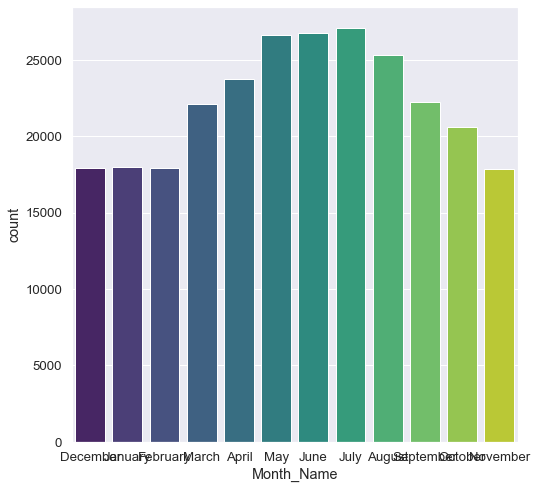

In [13]:
sns.countplot(x='Month_Name', data=df, palette='viridis')

<AxesSubplot:xlabel='Day_Name', ylabel='count'>

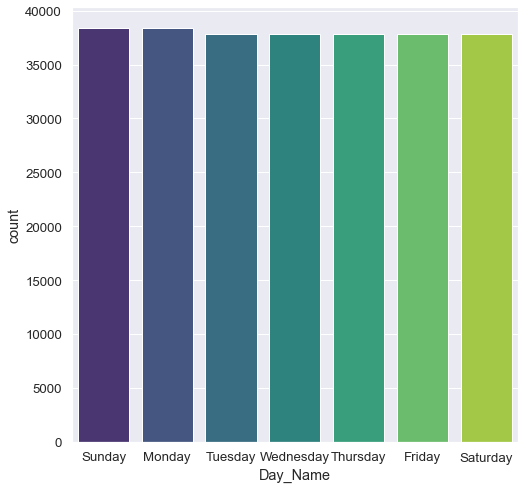

In [14]:
sns.countplot(x='Day_Name', data=df, palette='viridis')

<AxesSubplot:xlabel='count', ylabel='Month_Name'>

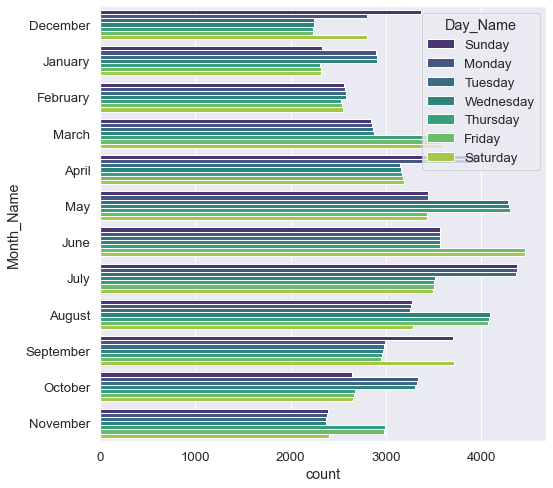

In [15]:
sns.countplot(y='Month_Name', data=df, palette='viridis', hue='Day_Name')

In [16]:
df.head()

,DATE,MST,Global_SPP,Zenith_Angle,Azimuth_Angle,Solar_Eclipse,Total_Cloud_Cover,Station_Pressure,Precipitation,Moisture,...,date,Year,Month,Month_Name,Week,Day,Week_Day,Day_Name,Hour,Minute
0,12/31/2017,07:24,2.25100,89.99719,120.17605,0,-1,820.202,0.0,0.0,...,2017-12-31 07:24:00,2017,12,December,52,31,6,Sunday,7,24
1,12/31/2017,07:25,2.36050,89.85344,120.33517,0,-1,820.216,0.0,0.0,...,2017-12-31 07:25:00,2017,12,December,52,31,6,Sunday,7,25
2,12/31/2017,07:26,2.55924,89.70895,120.49457,0,-1,820.197,0.0,0.0,...,2017-12-31 07:26:00,2017,12,December,52,31,6,Sunday,7,26
3,12/31/2017,07:27,2.74433,89.56361,120.65425,0,-1,820.227,0.0,0.0,...,2017-12-31 07:27:00,2017,12,December,52,31,6,Sunday,7,27
4,12/31/2017,07:28,2.88435,89.41737,120.81422,0,-1,820.248,0.0,0.0,...,2017-12-31 07:28:00,2017,12,December,52,31,6,Sunday,7,28


In [17]:
def map_hours(x):
    if x in [0,1,2,3,4,5,6,7,8,9,10,11,12]:
        return 'morning'
    elif x in [13,14,15,16]:
        return 'afternoon'
    else:
        return 'evening'
    
df['Period'] = df['Hour'].apply(map_hours)
df.head()

,DATE,MST,Global_SPP,Zenith_Angle,Azimuth_Angle,Solar_Eclipse,Total_Cloud_Cover,Station_Pressure,Precipitation,Moisture,...,Year,Month,Month_Name,Week,Day,Week_Day,Day_Name,Hour,Minute,Period
0,12/31/2017,07:24,2.25100,89.99719,120.17605,0,-1,820.202,0.0,0.0,...,2017,12,December,52,31,6,Sunday,7,24,morning
1,12/31/2017,07:25,2.36050,89.85344,120.33517,0,-1,820.216,0.0,0.0,...,2017,12,December,52,31,6,Sunday,7,25,morning
2,12/31/2017,07:26,2.55924,89.70895,120.49457,0,-1,820.197,0.0,0.0,...,2017,12,December,52,31,6,Sunday,7,26,morning
3,12/31/2017,07:27,2.74433,89.56361,120.65425,0,-1,820.227,0.0,0.0,...,2017,12,December,52,31,6,Sunday,7,27,morning
4,12/31/2017,07:28,2.88435,89.41737,120.81422,0,-1,820.248,0.0,0.0,...,2017,12,December,52,31,6,Sunday,7,28,morning


<AxesSubplot:xlabel='Day_Name', ylabel='count'>

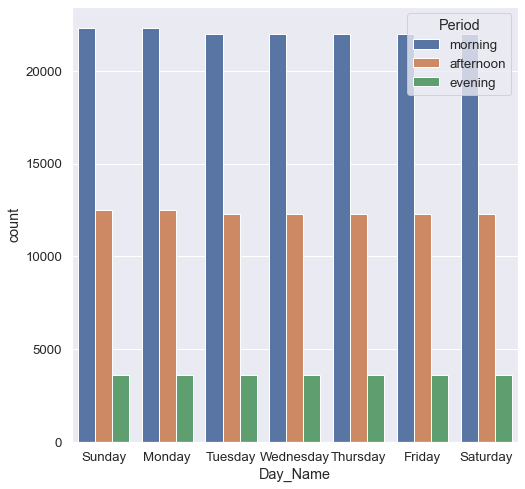

In [18]:
sns.countplot(x='Day_Name', hue='Period', data=df)

In [19]:
def map_months(x):
    if x in [12, 1, 2]:
        return 'Winter'
    elif x in [3, 4, 5]:
        return 'Spring'
    elif x in [6, 7, 8]:
        return 'Summer'
    elif x in [9, 10, 11]:
        return 'Autumn'

df['Season'] = df['Month'].apply(map_months)
df.head()

,DATE,MST,Global_SPP,Zenith_Angle,Azimuth_Angle,Solar_Eclipse,Total_Cloud_Cover,Station_Pressure,Precipitation,Moisture,...,Month,Month_Name,Week,Day,Week_Day,Day_Name,Hour,Minute,Period,Season
0,12/31/2017,07:24,2.25100,89.99719,120.17605,0,-1,820.202,0.0,0.0,...,12,December,52,31,6,Sunday,7,24,morning,Winter
1,12/31/2017,07:25,2.36050,89.85344,120.33517,0,-1,820.216,0.0,0.0,...,12,December,52,31,6,Sunday,7,25,morning,Winter
2,12/31/2017,07:26,2.55924,89.70895,120.49457,0,-1,820.197,0.0,0.0,...,12,December,52,31,6,Sunday,7,26,morning,Winter
3,12/31/2017,07:27,2.74433,89.56361,120.65425,0,-1,820.227,0.0,0.0,...,12,December,52,31,6,Sunday,7,27,morning,Winter
4,12/31/2017,07:28,2.88435,89.41737,120.81422,0,-1,820.248,0.0,0.0,...,12,December,52,31,6,Sunday,7,28,morning,Winter


<AxesSubplot:xlabel='Season', ylabel='count'>

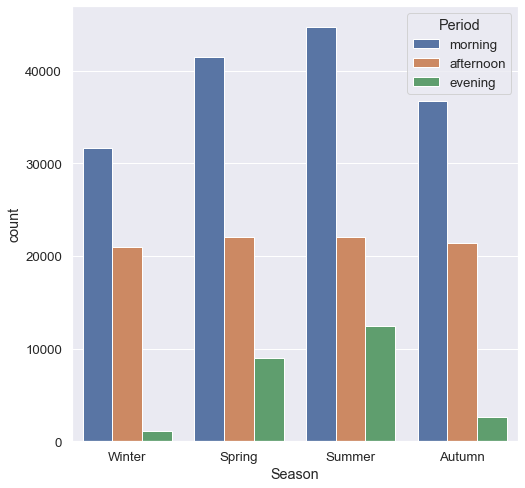

In [20]:
sns.countplot(x='Season', hue='Period', data=df)

<AxesSubplot:xlabel='Season', ylabel='Zenith_Angle'>

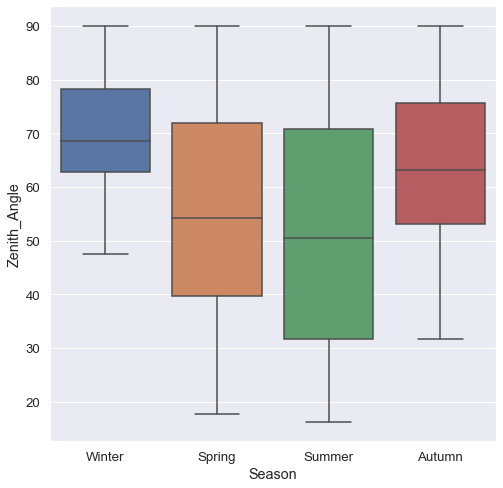

In [22]:
sns.boxplot(x='Season', y='Zenith_Angle', data=df)

In [24]:
df.head(1)

,DATE,MST,Global_SPP,Zenith_Angle,Azimuth_Angle,Solar_Eclipse,Total_Cloud_Cover,Station_Pressure,Precipitation,Moisture,...,Month,Month_Name,Week,Day,Week_Day,Day_Name,Hour,Minute,Period,Season
0,12/31/2017,07:24,2.251,89.99719,120.17605,0,-1,820.202,0.0,0.0,...,12,December,52,31,6,Sunday,7,24,morning,Winter


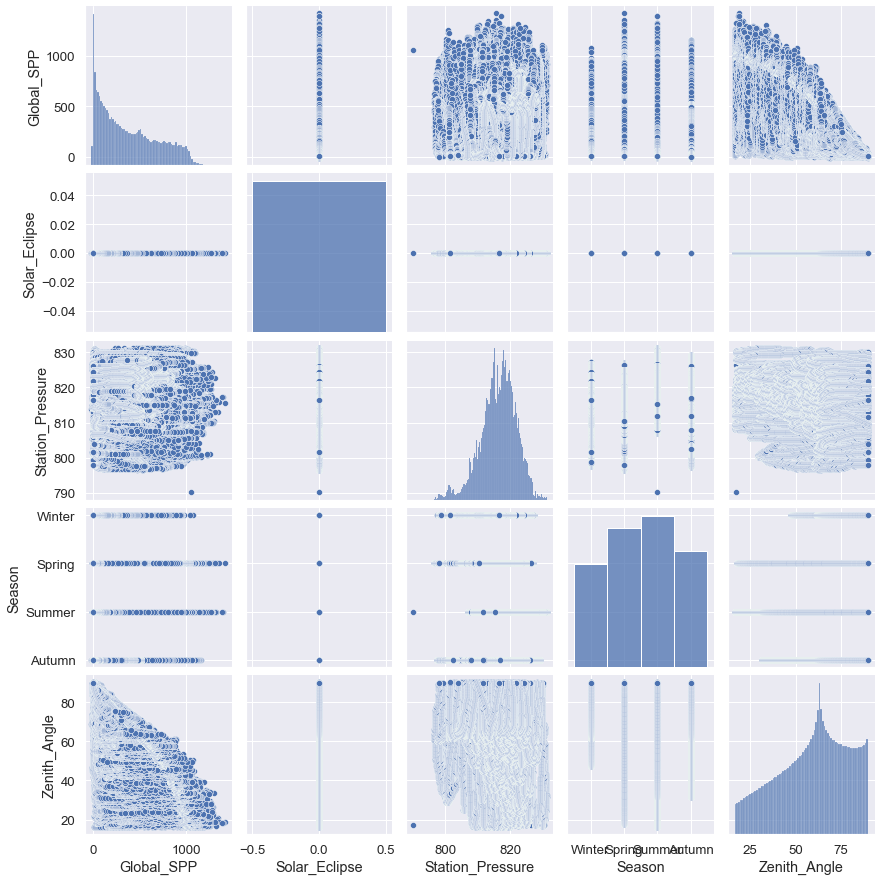

In [29]:
sns.pairplot(df, vars=['Global_SPP', 'Solar_Eclipse', 'Station_Pressure', 'Season', 'Zenith_Angle'])

In [30]:
df.isna().sum()

DATE                   0
MST                    0
Global_SPP             0
Zenith_Angle           0
Azimuth_Angle          0
Solar_Eclipse          0
Total_Cloud_Cover      0
Station_Pressure       0
Precipitation          0
Moisture               0
Broadband_Turbidity    0
date                   0
Year                   0
Month                  0
Month_Name             0
Week                   0
Day                    0
Week_Day               0
Day_Name               0
Hour                   0
Minute                 0
Period                 0
Season                 0
dtype: int64

In [32]:
df = pd.get_dummies(df, columns=['Period'], drop_first=True)
df

,DATE,MST,Global_SPP,Zenith_Angle,Azimuth_Angle,Solar_Eclipse,Total_Cloud_Cover,Station_Pressure,Precipitation,Moisture,...,Month_Name,Week,Day,Week_Day,Day_Name,Hour,Minute,Season,Period_evening,Period_morning
0,12/31/2017,07:24,2.25100,89.99719,120.17605,0,-1,820.202,0.0,0.0,...,December,52,31,6,Sunday,7,24,Winter,0,1
1,12/31/2017,07:25,2.36050,89.85344,120.33517,0,-1,820.216,0.0,0.0,...,December,52,31,6,Sunday,7,25,Winter,0,1
2,12/31/2017,07:26,2.55924,89.70895,120.49457,0,-1,820.197,0.0,0.0,...,December,52,31,6,Sunday,7,26,Winter,0,1
3,12/31/2017,07:27,2.74433,89.56361,120.65425,0,-1,820.227,0.0,0.0,...,December,52,31,6,Sunday,7,27,Winter,0,1
4,12/31/2017,07:28,2.88435,89.41737,120.81422,0,-1,820.248,0.0,0.0,...,December,52,31,6,Sunday,7,28,Winter,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266215,12/31/2018,16:39,2.21827,89.30087,239.07317,0,-1,816.477,0.0,1.0,...,December,1,31,0,Monday,16,39,Winter,0,0
266216,12/31/2018,16:40,2.20649,89.44778,239.23343,0,-1,816.482,0.0,1.0,...,December,1,31,0,Monday,16,40,Winter,0,0
266217,12/31/2018,16:41,2.24534,89.59378,239.39342,0,-1,816.466,0.0,1.0,...,December,1,31,0,Monday,16,41,Winter,0,0
266218,12/31/2018,16:42,2.31470,89.73890,239.55311,0,-1,816.495,0.0,1.0,...,December,1,31,0,Monday,16,42,Winter,0,0


In [33]:
x = df.drop(['DATE','Zenith_Angle' ,'MST', 'Year', 'date','Month','Day','Season','Month_Name','Week','Week_Day','Day_Name','Hour','Minute'], axis=1)
x

,Global_SPP,Azimuth_Angle,Solar_Eclipse,Total_Cloud_Cover,Station_Pressure,Precipitation,Moisture,Broadband_Turbidity,Period_evening,Period_morning
0,2.25100,120.17605,0,-1,820.202,0.0,0.0,0.32892,0,1
1,2.36050,120.33517,0,-1,820.216,0.0,0.0,0.22059,0,1
2,2.55924,120.49457,0,-1,820.197,0.0,0.0,0.19335,0,1
3,2.74433,120.65425,0,-1,820.227,0.0,0.0,0.20856,0,1
4,2.88435,120.81422,0,-1,820.248,0.0,0.0,0.22422,0,1
...,...,...,...,...,...,...,...,...,...,...
266215,2.21827,239.07317,0,-1,816.477,0.0,1.0,0.24961,0,0
266216,2.20649,239.23343,0,-1,816.482,0.0,1.0,0.24004,0,0
266217,2.24534,239.39342,0,-1,816.466,0.0,1.0,0.23398,0,0
266218,2.31470,239.55311,0,-1,816.495,0.0,1.0,0.22369,0,0


In [34]:
y = df['Zenith_Angle']
y

0         89.99719
1         89.85344
2         89.70895
3         89.56361
4         89.41737
            ...   
266215    89.30087
266216    89.44778
266217    89.59378
266218    89.73890
266219    89.88318
Name: Zenith_Angle, Length: 266220, dtype: float64

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=42)

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor


In [38]:
models = [LinearRegression(), DecisionTreeRegressor()]

In [39]:
for model in models:
    model.fit(x_train, y_train)
    print(model.score(x_test, y_test))

0.8892123537529114
0.978370984431619


In [40]:
model = DecisionTreeRegressor()
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.978402162939074

In [41]:
model.predict(x_test)[60]


37.73468

In [42]:
y_test.iloc[60]

37.74756

In [43]:
x.head()

,Global_SPP,Azimuth_Angle,Solar_Eclipse,Total_Cloud_Cover,Station_Pressure,Precipitation,Moisture,Broadband_Turbidity,Period_evening,Period_morning
0,2.25100,120.17605,0,-1,820.202,0.0,0.0,0.32892,0,1
1,2.36050,120.33517,0,-1,820.216,0.0,0.0,0.22059,0,1
2,2.55924,120.49457,0,-1,820.197,0.0,0.0,0.19335,0,1
3,2.74433,120.65425,0,-1,820.227,0.0,0.0,0.20856,0,1
4,2.88435,120.81422,0,-1,820.248,0.0,0.0,0.22422,0,1


In [44]:
model.predict([[2.25400,120.18605, 0 , -1, 820.202,0.0,0.0, 0.32897,0, 1]])

array([89.99719])

In [45]:
model.predict([[2.25400,120.18605, 0 , -1, 820.202,0.0,0.0, 0.32897,0, 1]])[0]

89.99719

In [46]:
round(model.predict([[2.25400,120.18605, 0 , -1, 820.202,0.0,0.0, 0.32897,0, 1]])[0])

90.0

In [47]:
int(round(model.predict([[2.25400,120.18605, 0 , -1, 820.202,0.0,0.0, 0.32897,0, 1]])[0]))

90

In [48]:
import joblib

In [49]:
joblib.dump(model, 'model2.pkl')

['model2.pkl']

# Good luck

### Yasir Hussein Shakir

#### E : Yasserhesseinshakir@yahoo.com

#### T : +9647905767055